In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
movie_path = '/Users/rollycostillas/Desktop/upenn/homework/The-First-Project/resources/netflix_titles.csv'

movie_df = pd.read_csv(movie_path)
movie_df = movie_df.dropna()
movie_sortbyyear_df = movie_df.sort_values(by=['release_year'], ascending=False)
movie_sortbyyear_df

df_2019 = movie_sortbyyear_df.loc[movie_sortbyyear_df['release_year'] == 2019]
df_2020 = movie_sortbyyear_df.loc[movie_sortbyyear_df['release_year'] == 2020]
df_2021 = movie_sortbyyear_df.loc[movie_sortbyyear_df['release_year'] == 2021]

country_2019 = pd.DataFrame(df_2019['country'].value_counts())
country_2020 = pd.DataFrame(df_2020['country'].value_counts())
country_2021 = pd.DataFrame(df_2021['country'].value_counts())

movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Number of Shows in 2019: 381
Number of Shows in 2020: 349
Number of Shows in 2021: 83


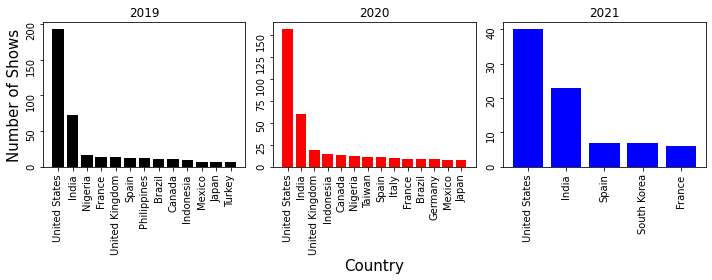

In [2]:
print(f"Number of Shows in 2019: {country_2019.loc[country_2019['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2020: {country_2020.loc[country_2020['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2021: {country_2021.loc[country_2021['country'] > 5].sum()[0]}")

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

df1=(country_2019.loc[country_2019['country'] > 5])
ax1.bar(df1.index, df1['country'], color='black')
ax1.tick_params(labelrotation=90)
ax1.set_ylabel("Number of Shows", size=15)
ax1.set_title("2019")

df2=(country_2020.loc[country_2020['country'] > 5])
ax2.bar(df2.index, df2['country'], color='r')
ax2.tick_params(labelrotation=90)
ax2.set_xlabel("Country", size=15)
ax2.set_title("2020")

df3=(country_2021.loc[country_2021['country'] > 5])
ax3.bar(df3.index, df3['country'], color='b')
ax3.tick_params(labelrotation=90)
ax3.set_title("2021")

fig1.tight_layout()

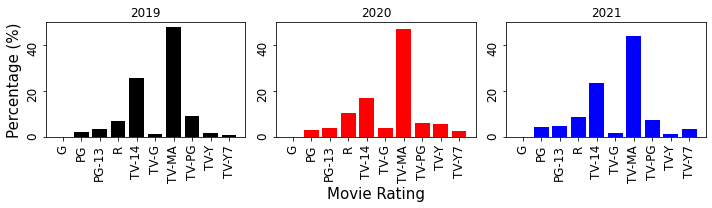

In [3]:
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(10,3))

rating_2019 = df_2019.groupby('rating').sum()/1047861*100
rating_2020 = df_2020.groupby('rating').sum()/892840*100
rating_2021 = df_2021.groupby('rating').sum()/325381*100

new_index = ['G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']

rating_2020 = pd.DataFrame(rating_2020['release_year'], index=new_index)
rating_2021 = pd.DataFrame(rating_2021['release_year'], index=new_index)
rating_2020 = rating_2020.fillna(0)
rating_2021 = rating_2021.fillna(0)

ax4.bar(rating_2019.index, rating_2019['release_year'], color='black')
ax4.set_ylim(0, 50)
ax4.set_ylabel("Percentage (%)", size=15)
ax4.tick_params(labelrotation=90, labelsize=12)
ax4.set_title("2019")

ax5.bar(rating_2020.index, rating_2020['release_year'], color='r')
ax5.set_xlabel("Movie Rating", size=15)
ax5.set_ylim(0, 50)
ax5.tick_params(labelrotation=90, labelsize=12)
ax5.set_title("2020")

ax6.bar(rating_2021.index, rating_2021['release_year'], color='b')
ax6.set_ylim(0, 50)
ax6.tick_params(labelrotation=90, labelsize=12)
ax6.set_title("2021")

fig2.tight_layout()
plt.show();

In [4]:
temp_df = pd.merge(rating_2019, rating_2020, left_index=True, right_index=True)
merged_df = pd.merge(temp_df, rating_2021, left_index=True, right_index=True)
merged_df = merged_df.rename(columns={'release_year_x': '2019',
                                       'release_year_y': '2020',
                                       'release_year': '2021'})

print("\t*Percentage of Rating from 2019 to 2021*\n")
print("\tRating\t 2019\t 2020\t 2021")
print("\t-------------------------------")
for index, row in merged_df.iterrows():
    print(f"\t{index}\t {round(row['2019'], 3)}\t {round(row['2020'], 3)}\t {round(row['2021'], 3)}")

	*Percentage of Rating from 2019 to 2021*

	Rating	 2019	 2020	 2021
	-------------------------------
	G	 0.193	 0.0	 0.0
	PG	 2.312	 2.941	 4.348
	PG-13	 3.661	 4.072	 4.969
	R	 6.936	 10.407	 8.696
	TV-14	 25.626	 16.968	 23.602
	TV-G	 1.541	 4.072	 1.863
	TV-MA	 47.977	 47.285	 44.099
	TV-PG	 9.249	 6.109	 7.453
	TV-Y	 1.734	 5.656	 1.242
	TV-Y7	 0.771	 2.489	 3.727


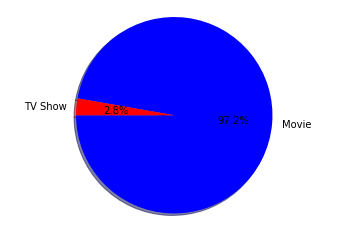

In [5]:
# ratio of movies & tv shows from dataset
pies = ["Movie", "TV Show"]
pie_type = [5185,147]
colors = ["blue", "red"]

# create a pie chart based upon the above data
plt.pie(pie_type, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig('../The-First-Project/pie_type.png')
plt.show()

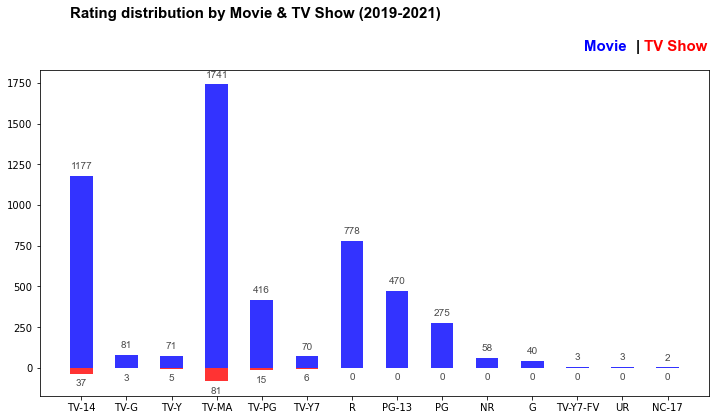

In [6]:
# distribution of ratings by type
order = pd.DataFrame(movie_df.groupby('rating')['type'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

movie_tvshow = movie_df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
movie = movie_tvshow.loc['Movie']
tv = - movie_tvshow.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='blue', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='red', alpha=0.8, label='TV Show')

# annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='arial',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='arial',
                   color='#4a4a4a')   

fig.text(0.16, 1, 'Rating distribution by Movie & TV Show (2019-2021)', fontsize=15, fontweight='bold', fontfamily='arial')
fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='arial', fontsize=15, color='blue')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='arial', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='arial', fontsize=15, color='red')

plt.show()

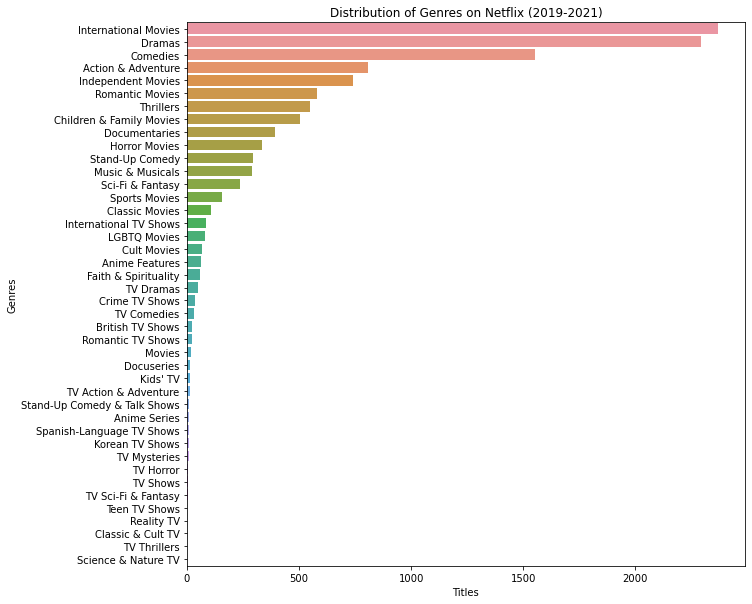

In [7]:
filtered_genres = movie_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:])
plt.title('Distribution of Genres on Netflix (2019-2021)')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()